In [18]:
%pip install matplotlib
%pip install japanize-matplotlib
%pip install seaborn
%pip install pandas
%pip install matplotlib_fontja


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_fontja
matplotlib_fontja.japanize()

In [12]:
# ① CSV のパス
csv_path = '/Users/kanaha/statistics/SSDSE-A-2024.csv'

# ② 先頭 1 行（不要な行）をスキップして読み込む
#    → 2 行目が列名、3 行目以降がデータとなる
df = pd.read_csv(
        csv_path,
        encoding='shift-jis',   # 元ファイルが Shift-JIS の場合
        skiprows=2,            # 先頭 1 行を読み飛ばす
        header=0               # （既定値）skiprows 後の 1 行目を列名にする
     )

# ③ これですでに DataFrame 型
print(type(df))         # <class 'pandas.core.frame.DataFrame'>

# ④ 内容を確認
print(df.head())        # 先頭 5 行を表示

# ⑤ 必要であればインデックスを振り直す
df.reset_index(drop=True, inplace=True)

# ⑥ 後で再保存したい場合
# df.to_csv(csv_path, index=False, encoding='shift-jis')

<class 'pandas.core.frame.DataFrame'>
    地域コード 都道府県 市区町村      総人口  総人口（男）   総人口（女）    日本人人口  日本人人口（男）  日本人人口（女）  \
0  R01100  北海道  札幌市  1973395  918682  1054713  1933094    897727   1035367   
1  R01202  北海道  函館市   251084  113965   137119   248208    112718    135490   
2  R01203  北海道  小樽市   111299   50136    61163   109971     49441     60530   
3  R01204  北海道  旭川市   329306  152108   177198   325287    150318    174969   
4  R01205  北海道  室蘭市    82383   40390    41993    81658     39960     41698   

   15歳未満人口  ...   小売店数  飲食店数  大型小売店数  一般病院数  一般診療所数  歯科診療所数   医師数  歯科医師数  \
0   215366  ...  10370  7354     348    177    1413    1206  6978   2142   
1    23560  ...   2163  1256      41     26     206     122   822    182   
2     9169  ...   1097   616      17     11      79      78   338    105   
3    34691  ...   2409  1503      67     33     227     170  1364    246   
4     7769  ...    621   447      13      6      52      39   249     56   

   薬剤師数  保育所等数（基本票）  
0  5758       

In [13]:
# # ⑦ DataFrame 内の 1 行目（インデックス 0）を削除してインデックスを振り直す
# df = df.iloc[1:].reset_index(drop=True)
# 1 行目・1 列目を除いた部分だけを切り出し、
# そのまま DataFrame として受け取る
df = df.iloc[2:, 1:].reset_index(drop=True)
print(df.head)

<bound method NDFrame.head of      都道府県  市区町村     総人口  総人口（男）  総人口（女）   日本人人口  日本人人口（男）  日本人人口（女）  15歳未満人口  \
0     北海道   小樽市  111299   50136   61163  109971     49441     60530     9169   
1     北海道   旭川市  329306  152108  177198  325287    150318    174969    34691   
2     北海道   室蘭市   82383   40390   41993   81658     39960     41698     7769   
3     北海道   釧路市  165077   77506   87571  163026     76789     86237    16634   
4     北海道   帯広市  166536   79623   86913  165759     79211     86548    19073   
...   ...   ...     ...     ...     ...     ...       ...       ...      ...   
1734  沖縄県  久米島町    7192    3823    3369    7152      3802      3350     1075   
1735  沖縄県  八重瀬町   30941   15244   15697   30805     15148     15657     5977   
1736  沖縄県  多良間村    1058     575     483    1047       574       473      150   
1737  沖縄県   竹富町    3942    2033    1909    3898      2013      1885      707   
1738  沖縄県  与那国町    1676     923     753    1661       913       748      302   

      15歳

In [14]:
#欠損値を確認する
df.isnull().sum()

都道府県          0
市区町村          0
総人口           0
総人口（男）        0
総人口（女）        0
             ..
歯科診療所数        0
医師数           0
歯科医師数         0
薬剤師数          0
保育所等数（基本票）    0
Length: 127, dtype: int64

In [29]:
# 数値化（文字列で読まれても NaN にならず float に変わる）
df['15歳未満人口'] = pd.to_numeric(df['15歳未満人口'])
df['出生数']       = pd.to_numeric(df['出生数'])

# 子ども人口減少率（小数）
df['子ども人口減少率'] = (df['出生数'] - df['15歳未満人口'] / 15) / df['15歳未満人口']

# 百分率で欲しければ
df['子ども人口減少率%'] = df['子ども人口減少率'] * 100

# 結果表示
print(df[['都道府県' , '市区町村' , '子ども人口減少率', '子ども人口減少率%']])

     都道府県  市区町村  子ども人口減少率  子ども人口減少率%
0     北海道   小樽市 -0.020642  -2.064202
1     北海道   旭川市 -0.013396  -1.339637
2     北海道   室蘭市 -0.014022  -1.402154
3     北海道   釧路市 -0.020376  -2.037594
4     北海道   帯広市 -0.011825  -1.182474
...   ...   ...       ...        ...
1734  沖縄県  久米島町  0.001240   0.124031
1735  沖縄県  八重瀬町 -0.006603  -0.660309
1736  沖縄県  多良間村 -0.046667  -4.666667
1737  沖縄県   竹富町 -0.012918  -1.291843
1738  沖縄県  与那国町 -0.036865  -3.686534

[1739 rows x 4 columns]


In [30]:
# 表示したい列だけ抜粋
target_cols = ['都道府県', '市区町村' , '子ども人口減少率', '子ども人口減少率%']

# ── 昇順（減少率が大きい順）────────────────────────
sorted_df_asc = df[target_cols].sort_values('子ども人口減少率%', ascending=True)
print('【昇順】子ども人口減少率% が小さい順')
display(sorted_df_asc)

# ── 降順（減少率が小さい順）───────────────────────
sorted_df_desc = df[target_cols].sort_values('子ども人口減少率%', ascending=False)
print('【降順】子ども人口減少率% が大きい順')
display(sorted_df_desc)

【昇順】子ども人口減少率% が小さい順


,都道府県,市区町村,子ども人口減少率,子ども人口減少率%
871,長野県,平谷村,-0.066667,-6.666667
685,東京都,青ヶ島村,-0.066667,-6.666667
1320,岡山県,新庄村,-0.056566,-5.656566
1268,鳥取県,若桜町,-0.056195,-5.619546
216,青森県,新郷村,-0.054545,-5.454545
...,...,...,...,...
401,福島県,葛尾村,0.225000,22.500000
396,福島県,富岡町,0.700000,70.000000
400,福島県,浪江町,1.394872,139.487179
398,福島県,大熊町,57.933333,5793.333333


【降順】子ども人口減少率% が大きい順


,都道府県,市区町村,子ども人口減少率,子ども人口減少率%
399,福島県,双葉町,inf,inf
398,福島県,大熊町,57.933333,5793.333333
400,福島県,浪江町,1.394872,139.487179
396,福島県,富岡町,0.700000,70.000000
401,福島県,葛尾村,0.225000,22.500000
...,...,...,...,...
216,青森県,新郷村,-0.054545,-5.454545
1268,鳥取県,若桜町,-0.056195,-5.619546
1320,岡山県,新庄村,-0.056566,-5.656566
685,東京都,青ヶ島村,-0.066667,-6.666667


/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_96727/492094309.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pref_rate,
/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_96727/492094309.py:34: UserWarning: Glyph 28187 (\N{CJK UNIFIED IDEOGRAPH-6E1B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_96727/492094309.py:34: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_96727/492094309.py:34: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_96727/492094309.py:34: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}

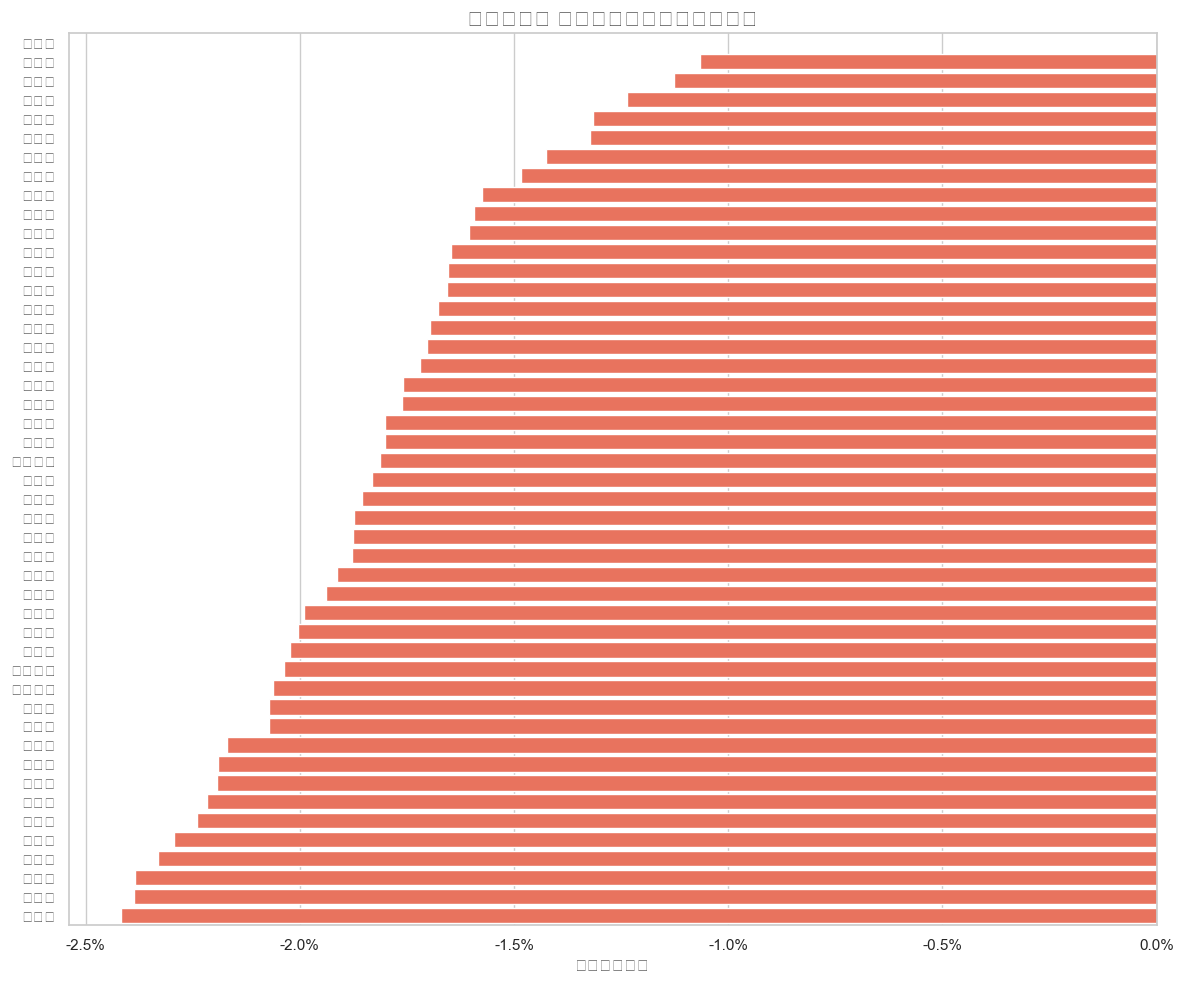

In [25]:
import matplotlib.ticker as mtick
import seaborn as sns

plt.rcParams['font.family'] = 'IPAexGothic'  # または IPAPGothic / IPAexGothic
plt.rcParams['axes.unicode_minus'] = False

sns.set_style("whitegrid")

# ❶ 子ども人口減少率% がまだ無い場合は作成
if '子ども人口減少率%' not in df.columns:
    df['子ども人口減少率%'] = df['子ども人口減少率'] * 100

# ❷ 都道府県ごとに平均（または最新年など任意の指標）を取る
pref_rate = (df
             .groupby('都道府県', as_index=False)['子ども人口減少率%']
             .mean()                           # ←平均値。最新年だけ欲しいなら .last() などに変更
             .sort_values('子ども人口減少率%', ascending=False))

# ❸ プラス（増加）とマイナス（減少）で色分け
colors = ['royalblue' if x >= 0 else 'tomato' for x in pref_rate['子ども人口減少率%']]

# ❹ 可視化
plt.figure(figsize=(12, 10))
sns.barplot(data=pref_rate,
            y='都道府県',
            x='子ども人口減少率%',
            palette=colors)

plt.axvline(0, color='k', lw=0.8)                 # 0％の基準線
plt.title('都道府県別 子ども人口減少率（平均）', fontsize=16)
plt.xlabel('減少率（％）', fontsize=12)
plt.ylabel('')                                    # y 軸ラベル不要
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
plt.tight_layout()
plt.show()